# Spanish Gender Stats
This is a simple practice at some very basic data analysis and plotting.  In a separate Python script- FinalScraper, I scraped a basic list of the most popular 2000 nouns.  That scraper was very messy due to inconsistent formatting on the source page.  A few of the 2000 were discarded as "not worth the hassle" to accommodate every single format variant.  98% were covered with 5 formats there.  And some words were "doubled up" with a special o/a or word/word nomenclature, and those were split to 2 lines.

The net result was a CSV file in a very simple word,gender format.  Genders are masculine, feminine, and both (for things like Professions).

I generate 3 representations of data below:
1. Total distribution of m/f/both nouns
2. -o (normally masculine) excpetions and -a (normally feminine) exceptions
3. A table listing the exceptions for each, as well as a list of the words that are both genders in the 3rd column.

As said, simple stuff.  This is for me to learn with.

In [114]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

filename = 'parsed_spanish_words.csv'

# Initialize counts for each gender
masculine_count = 0
feminine_count = 0
both_count = 0

# Color Choices
colorMasculine = '#435D7B' # Cool bluish
colorFeminine = '#CB5050'  # Warm reddish
colorBoth = '#8A4DB9'      # Purple tween color

## This section simply reads in the file and counts up the genders

In [116]:
# Open and read the file
with open(filename, 'r', encoding='utf-8') as file:
    for line in file:
        # Remove leading/trailing whitespace and skip empty lines
        line = line.strip()
        if not line:
            continue

        # Split the line into noun and gender
        parts = line.split(',')
        if len(parts) != 2:
            print(f"Skipping improperly formatted line: {line}")
            continue

        noun, gender = parts
        gender = gender.strip().lower()

        # Increment the appropriate counter
        if gender == 'masculine':
            masculine_count += 1
        elif gender == 'feminine':
            feminine_count += 1
        elif gender == 'both':
            both_count += 1
        else:
            print(f"Unknown gender '{gender}' for noun '{noun}'")

## Now, let's create the pie chart from those counts. Easy peasy.

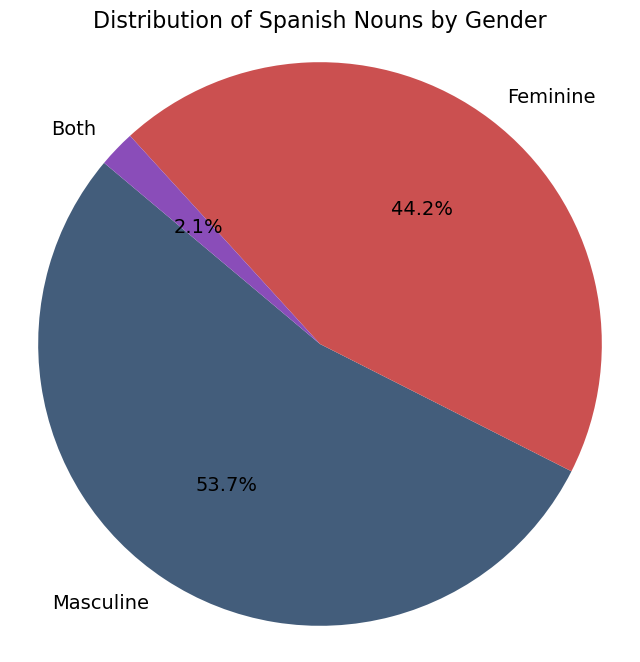

In [118]:
# Prepare data for the pie chart
labels = ['Masculine', 'Feminine', 'Both']
sizes = [masculine_count, feminine_count, both_count]
colors = [colorMasculine, colorFeminine, colorBoth]

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust the figure size
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 14}
)
plt.title('Distribution of Spanish Nouns by Gender', fontsize=16)
plt.axis('equal')  # Ensures that pie is drawn as a circle
plt.show()

## And now, for the exception pie charts

In [120]:
# Initialize counts for correctly gendered nouns
masculine_o = 0  # Correctly masculine nouns ending with 'o'
feminine_a = 0   # Correctly feminine nouns ending with 'a'

# Lists to store exceptions
masculine_exceptions = []  # 'a' ending nouns that are masculine
feminine_exceptions = []   # 'o' ending nouns that are feminine
both_words = []            # Nouns labeled 'both'

Not bothering to optimize here and just rereading the file.  This is from ChatGPT o1-preview.

In [122]:
# Open and read the file
with open(filename, 'r', encoding='utf-8') as file:
    for line in file:
        # Remove leading/trailing whitespace and skip empty lines
        line = line.strip()
        if not line:
            continue

        # Split the line into noun and gender
        parts = line.split(',')
        if len(parts) != 2:
            print(f"Skipping improperly formatted line: {line}")
            continue

        noun, gender = parts
        noun = noun.strip()
        gender = gender.strip().lower()

        # Process the noun based on its ending and gender
        if noun.endswith('o'):
            if gender == 'masculine':
                masculine_o += 1  # Correct
            elif gender == 'feminine':
                feminine_exceptions.append(noun)  # Exception
            elif gender == 'both':
                both_words.append(noun)
            else:
                print(f"Unknown gender '{gender}' for noun '{noun}'")
        elif noun.endswith('a'):
            if gender == 'feminine':
                feminine_a += 1   # Correct
            elif gender == 'masculine':
                masculine_exceptions.append(noun)  # Exception
            elif gender == 'both':
                both_words.append(noun)
            else:
                print(f"Unknown gender '{gender}' for noun '{noun}'")
        else:
            if gender == 'both':
                both_words.append(noun)
            # Nouns not ending with 'o' or 'a' are not included in counts

### And now for the plots (pie charts) themselves

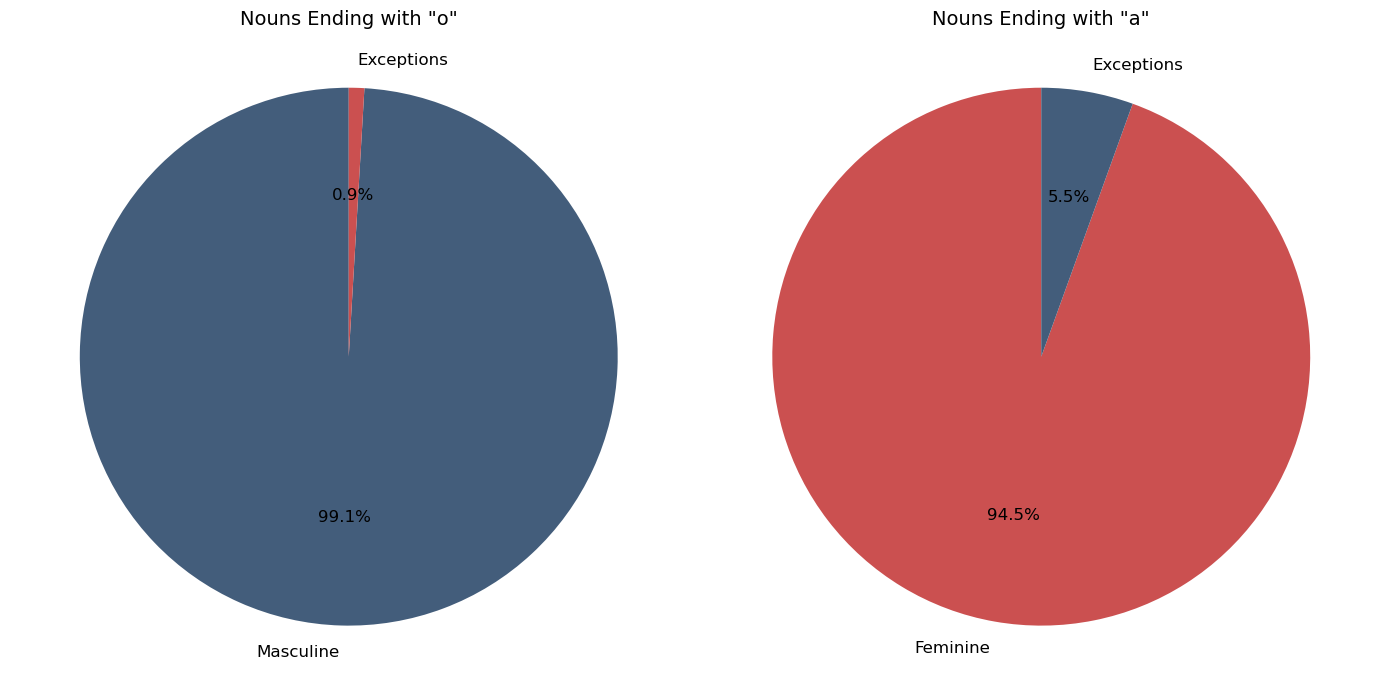

In [124]:
# Prepare data for the pie charts
# For nouns ending with 'o'
total_o = masculine_o + len(feminine_exceptions) + len([w for w in both_words if w.endswith('o')])
labels_o = ['Masculine', 'Exceptions']
sizes_o = [
    masculine_o,
    len(feminine_exceptions) + len([w for w in both_words if w.endswith('o')])
]

# For nouns ending with 'a'
total_a = feminine_a + len(masculine_exceptions) + len([w for w in both_words if w.endswith('a')])
labels_a = ['Feminine', 'Exceptions']
sizes_a = [
    feminine_a,
    len(masculine_exceptions) + len([w for w in both_words if w.endswith('a')])
]

# Plot side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for nouns ending with 'o'
ax1.pie(
    sizes_o,
    labels=labels_o,
    autopct='%1.1f%%',
    colors=[colorMasculine, colorFeminine],
    startangle=90,
    textprops={'fontsize': 12}
)
ax1.set_title('Nouns Ending with "o"', fontsize=14)

# Pie chart for nouns ending with 'a'
ax2.pie(
    sizes_a,
    labels=labels_a,
    autopct='%1.1f%%',
    colors=[colorFeminine, colorMasculine],
    startangle=90,
    textprops={'fontsize': 12}
)
ax2.set_title('Nouns Ending with "a"', fontsize=14)

# Ensure pie charts are circular
ax1.axis('equal')
ax2.axis('equal')

plt.tight_layout()

## And now, for the table generation
3 columns, -o Feminine exceptions, -a Masculine exceptions, and words that are Both genders. This is from the data already used for the pie charts, so not opening the file for a 3rd time 😀

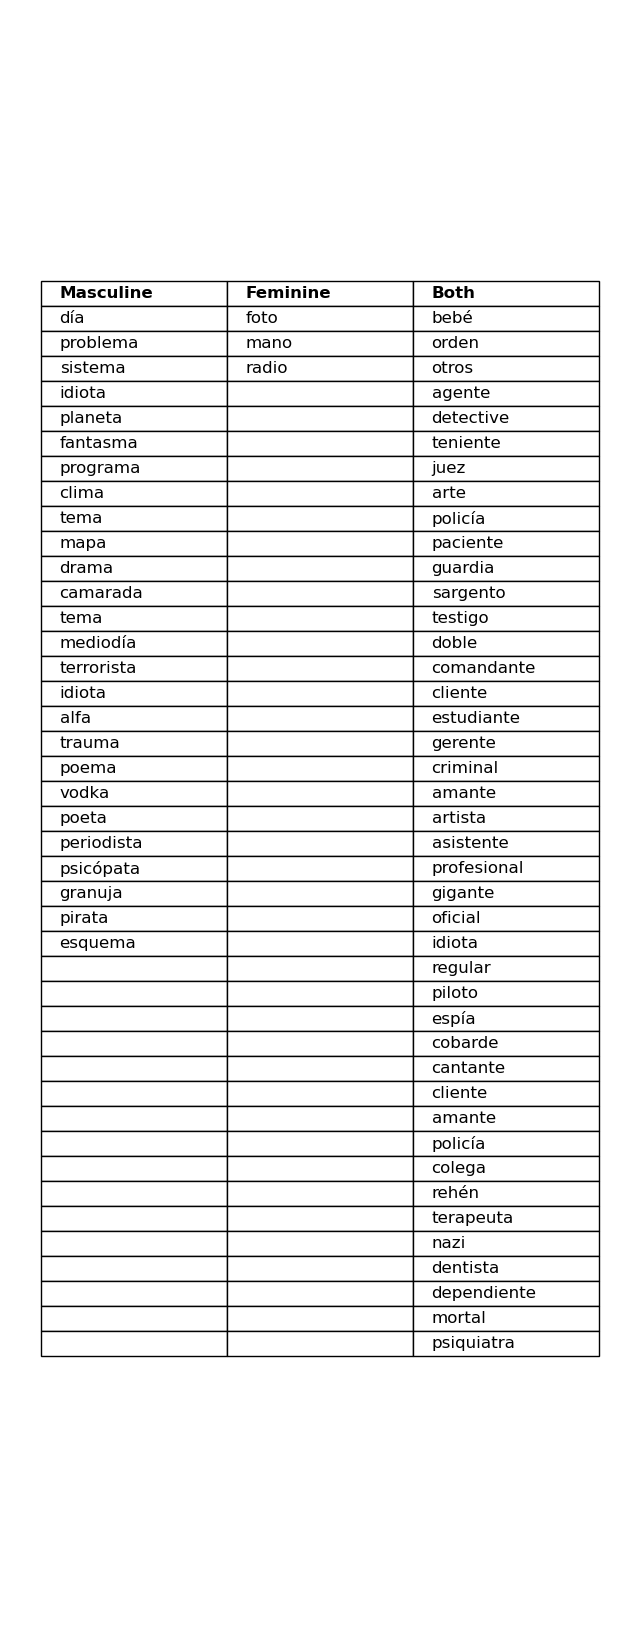

In [128]:
# Prepare data for the exceptions table
max_rows = max(len(masculine_exceptions), len(feminine_exceptions), len(both_words))
table_data = [['Masculine', 'Feminine', 'Both']]  # Header row

# Pad the shorter lists with empty strings to match the length of the longest list
masculine_exceptions += [''] * (max_rows - len(masculine_exceptions))
feminine_exceptions += [''] * (max_rows - len(feminine_exceptions))
both_words += [''] * (max_rows - len(both_words))

# Combine the lists into rows for the table
for i in range(max_rows):
    row = [masculine_exceptions[i], feminine_exceptions[i], both_words[i]]
    table_data.append(row)

# Create a new figure for the table
fig, ax = plt.subplots(figsize=(8, max_rows * 0.5))
ax.axis('off')  # Hide the axes

# Create the table
table = ax.table(cellText=table_data, loc='center', cellLoc='left', colWidths=[0.3, 0.3, 0.3])

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the scale as needed

# Make header row bold
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')

plt.show()